In [1]:
import xarray as xr
import valenspy as vp
from valenspy.preprocessing_tasks.regrid import remap_cdo

# Comparing regridding using cdo_python vs cdo
Quick test to compare regridding using cdo and cdo_python.

NOTE - The results are quite inconsistent when re-running them and seem to depend on the state of the VSC.

## Load the data

In [2]:
manager = vp.InputManager(machine="hortense")
ds_ref = manager.load_data("ERA5","tas", period=1995,freq="daily",region="europe", path_identifiers = ["-daily-"])

File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/europe/daily/2m_temperature/era5-daily-europe-2m_temperature-1995.nc
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds']


## Regridding to 1x1 degree grid

In [3]:
gridfile = "r360x180"
ds_file_path = manager._get_file_paths('ERA5', "tas", period=[1995, 1995], freq="daily", region="europe", path_identifiers = ["-daily-"])[0]
ds = ds_ref

### CDO

In [4]:
%%timeit
!cdo remapbil,{gridfile} {ds_file_path} /tmp/test_2.nc
ds_regridded_cdo = xr.open_dataset("/tmp/test_2.nc")

cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [4.59s 126MB]
cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [3.65s 125MB]
cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5

A more fair comparison (and something that we will also have to do if we want to include it in valenspy):

In [5]:
%%timeit


!cdo remapbil,{gridfile} {ds_file_path} /tmp/test_out.nc
ds_regridded_cdo = xr.open_dataset("/tmp/test_out.nc")

cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [4.60s 125MB]
cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [4.06s 125MB]
cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5

### CDO-python
Force is true is needed as remap_cdo uses available cache files if they exist by default.

In [6]:
%%timeit

ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil") 

2.51 s ± 778 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Comparing the different regridding options
Maybe not ideaal test for nn as a europe grid is being mapped to a global grid

In [7]:
gridfile = "r360x180"
ds_file_path = manager._get_file_paths('ERA5', "tas", period=[1995, 1995], freq="daily", region="europe", path_identifiers = ["-daily-"])[0]
ds = ds_ref

In [8]:
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil")
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="con")
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="dis")
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="nn")

3.07 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.07 times longer than the fastest. This could mean that an intermediate result is being cached.
4 s ± 2.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.55 times longer than the fastest. This could mean that an intermediate result is being cached.
7.27 s ± 3.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.54 s ± 1.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


This compares the regridding methods but should not be used to compare cdo and cdo-python as no IO is done in from xarray in the cdo case, this is done in the cdo-python case.

In [9]:
%timeit !cdo remapbil,{gridfile} {ds_file_path} /tmp/test_bil_out.nc
%timeit !cdo remapcon,{gridfile} {ds_file_path} /tmp/test_con_out.nc
%timeit !cdo remapdis,{gridfile} {ds_file_path} /tmp/test_dis_out.nc
%timeit !cdo remapnn,{gridfile} {ds_file_path} /tmp/test_nn_out.nc

cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [10.01s 267MB]
cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo 

## Testing the impact of caching and output paths
Note that the default for remap_cdo (valenspy) is to use the cached files, this is not the case for cdo-python.

### Temperary directories impact
Without caching - using the standard temp directory seems to be faster

In [10]:
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil")
%timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil", tempdir="/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/tmp")


3.04 s ± 1.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.83 s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Caching
Caching is currently not possible when also returning an xarray. This is a bug in cdo_python. Therefore, we will currently not support caching in valenspy.

In [11]:
import cdo
cdo_obj = cdo.Cdo(tempdir="/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/tmp/test")

In [16]:
ds_regridded_cdo_python = cdo_obj.remapbil(gridfile, input=ds, returnXDataset=True, force=False)
ds_regridded_cdo_python #Returns an empty list

[]

In [13]:
ds_regridded_cdo_python = cdo_obj.remapbil(gridfile, input=ds, returnXDataset=True)
ds_regridded_cdo_python #Returns a dataset

<xarray.Dataset> Size: 189MB
Dimensions:    (time: 365, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 3kB 1995-01-01T11:30:00 ... 1995-12-31T1...
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
    tas        (time, lat, lon) float64 189MB ...
Attributes:
    CDI:               Climate Data Interface version 2.1.1 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Fri Aug 02 11:33:30 2024: cdo -O -s -f nc -remapbil,r3...
    frequency:         day
    dataset:           ERA5
    freq:              daily
    region:            europe
    path_identifiers:  -daily-
    CDO:               Climate Data Operators version 2.1.1 (https://mpimet.m...

For future testing of caching - force is no longer an option in remap_cdo - see above

In [14]:
# %timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil", force=False) #With caching
# %timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil", force=True) #Without caching
# %timeit ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil", tempdir="/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/tmp") #With caching and tempdir

### Quick plot to compare the results

In [17]:
from valenspy.inputconverter_functions import ERA5_to_CF
from pathlib import Path

!cdo remapbil,{gridfile} {ds_file_path} /tmp/test_2.nc
ic = vp.InputConverter(ERA5_to_CF)
ds_regridded_cdo = ic.convert_input(Path("/tmp/test_2.nc"))

cdo    remapbil: Bilinear weights from lonlat (289x163) to lonlat (360x180) grid
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Processed 17194055 values from 1 variable over 365 timesteps [3.34s 272MB]
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds']


In [18]:
ds_regridded_cdo_python = remap_cdo(gridfile, ds_ref, remap_method="bil")

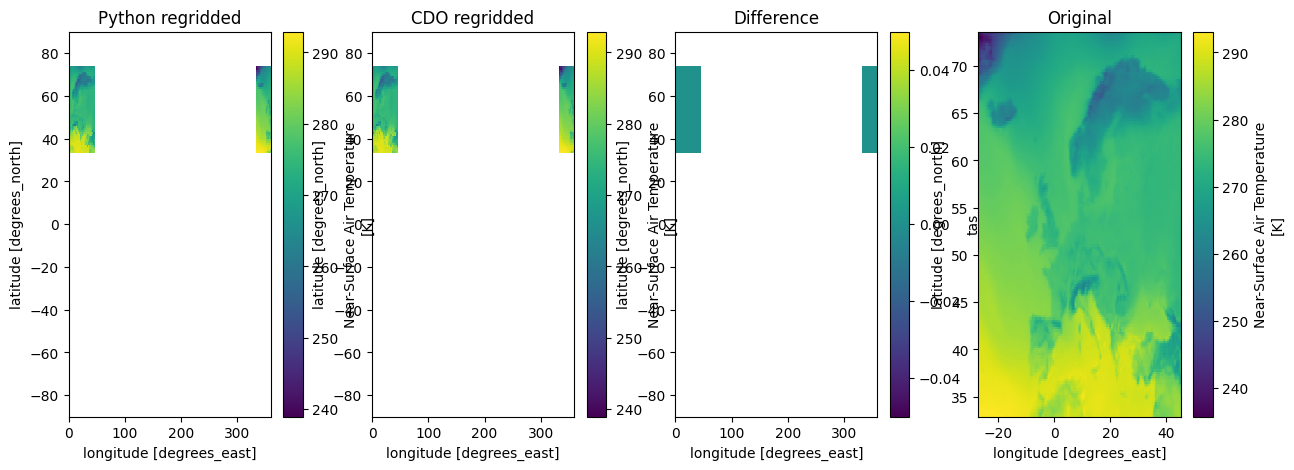

In [19]:
#Plot ds_regridded_cdo_python and ds_regridded_cdo
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,4, figsize=(15,5))
ds_regridded_cdo_python.isel(time=0).tas.plot(ax=axs[0])
ds_regridded_cdo.tas.isel(time=0).plot(ax=axs[1])
(ds_regridded_cdo_python.tas.isel(time=0) - ds_regridded_cdo.tas.isel(time=0)).plot(ax=axs[2])
ds_ref.tas.isel(time=0).plot(ax=axs[3])
#Axis titles
axs[0].set_title("Python regridded")
axs[1].set_title("CDO regridded")
axs[2].set_title("Difference")
axs[3].set_title("Original")
plt.show()

## Bigger test
Note change to other regridding type (currently bilinear) in the code itself.

In [ ]:
gridfile = #The gridfile for cdo regridding
ds_file_path = #The path to the files to regrid
ds = #The dataset to regrid (xarray dataset)

### CDO

In [ ]:
%%timeit
!cdo remapbil,{gridfile} {ds_file_path} /tmp/test_2.nc
ds_regridded_cdo = xr.open_dataset("/tmp/test_2.nc")

A more fair comparison (and something that we will also have to do if we want to include it in valenspy):

In [ ]:
%%timeit

ds.to_netcdf("/tmp/test_in.nc")
!cdo remapbil,{gridfile} /tmp/test_in.nc /tmp/test_out.nc
ds_regridded_cdo = xr.open_dataset("/tmp/test_out.nc")

### CDO-python

In [ ]:
%%timeit

ds_regridded_cdo_python = remap_cdo(gridfile, ds, remap_method="bil")

### Quick plot to compare the results

In [ ]:
from valenspy.inputconverter_functions import ERA5_to_CF
from pathlib import Path

!cdo remapbil,{gridfile} {ds_file_path} /tmp/test_2.nc
ic = vp.InputConverter(ERA5_to_CF)
ds_regridded_cdo = ic.convert_input(Path("/tmp/test.nc"))
ds_regridded_cdo_python = remap_cdo(gridfile, ds_ref, remap_method="bil")

In [ ]:
#Plot ds_regridded_cdo_python and ds_regridded_cdo
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,4, figsize=(15,5))
ds_regridded_cdo_python.isel(time=0).tas.plot(ax=axs[0])
ds_regridded_cdo.tas.isel(time=0).plot(ax=axs[1])
(ds_regridded_cdo_python.tas.isel(time=0) - ds_regridded_cdo.tas.isel(time=0)).plot(ax=axs[2])
ds_ref.tas.isel(time=0).plot(ax=axs[3])
#Axis titles
axs[0].set_title("Python regridded")
axs[1].set_title("CDO regridded")
axs[2].set_title("Difference")
axs[3].set_title("Original")
plt.show()